# 전처리

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [2]:
from sklearn import preprocessing


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Embarked

In [4]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [5]:
train['Embarked'] = train['Embarked'].fillna('C')
test['Embarked'] = test['Embarked'].fillna('C')

In [6]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

## Name(Title)

In [7]:
train_test_data = [train,test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [8]:
title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3
                 , 'Dr':4, 'Rev':4, 'Mlle':4, 'Major':4, 'Col':4
                 ,'Countess':4, 'Capt':4, 'Ms':4, 'Sir':4, 'Lady':4
                 , 'Mme':4, 'Don':4, 'Jonkheer':4
                 }
train['Title'] = train['Title'].map(title_mapping)

In [9]:
title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3
                 , 'Col':4, 'Rev':4, 'Ms':4, 'Dr':4, 'Dona':4
                 }

test['Title'] = test['Title'].map(title_mapping)

(0.0, 0.01)

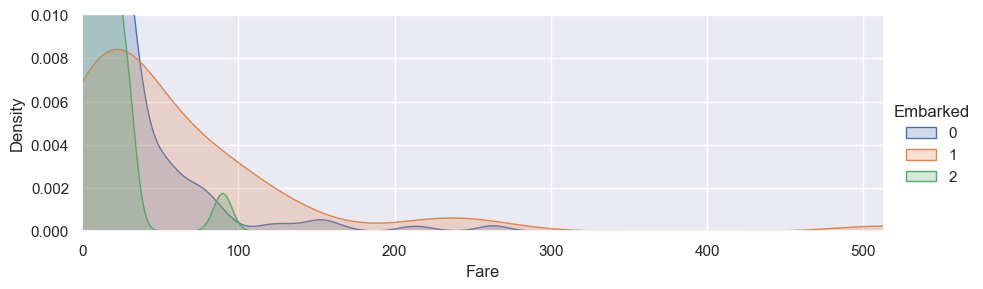

In [10]:
sns.set(color_codes=True)

facet = sns.FacetGrid(train, hue='Embarked',aspect=3)
facet.map(sns.kdeplot,'Fare',fill=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.ylim(0,0.01)

In [11]:
train[train['Cabin'].str.extract('([F] [A-Z]\d+)',expand=False).notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,0,0
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,1,1
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,0,0
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,0,0


## Fare

In [12]:
train.sort_values(by='Ticket').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,0,1
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.50,B77,0,1
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B77,0,4
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,0,0
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,0,2


In [13]:
ticket_num_list = train['Ticket'].unique()

In [14]:
#110152
train[train['Ticket']=='110152']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,B77,0,1
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,B79,0,1
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,0,4


### group size

In [15]:
for ticket_num in train['Ticket'].unique():
    train.loc[train['Ticket']==ticket_num,'group_size'] = len(train[train['Ticket']==ticket_num])

for ticket_num in test['Ticket'].unique():
    test.loc[test['Ticket']==ticket_num,'group_size'] = len(test[test['Ticket']==ticket_num])

In [16]:
train.sort_values(by='Ticket').head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,0,1,3.0
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,0,1,3.0
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,0,4,3.0
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,0,0,3.0
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,0,2,3.0
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,0,1,3.0
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,0,0,2.0
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,0,0,2.0
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,0,0,1.0
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,1,2,1.0


In [17]:
train['Fare'][504] , train['group_size'][504]

(86.5, 3.0)

In [18]:
train['Fare'][504] / train['group_size'][504]

28.833333333333332

In [19]:
train['Fare'] = train['Fare']/train['group_size']

In [20]:
#train[train['Fare']>100]

<Axes: >

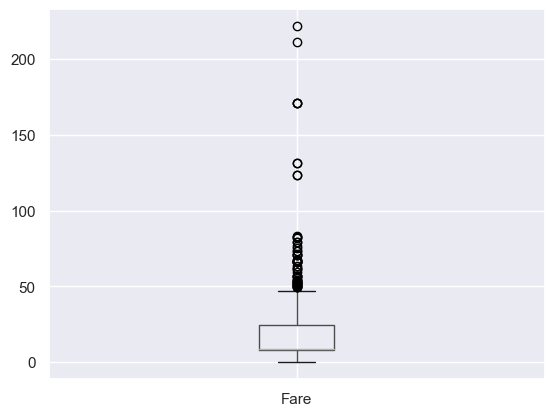

In [21]:
train.boxplot(column='Fare')

In [22]:
train['Fare'].describe()

count    891.000000
mean      17.788989
std       21.218157
min        0.000000
25%        7.762500
50%        8.850000
75%       24.288200
max      221.779200
Name: Fare, dtype: float64

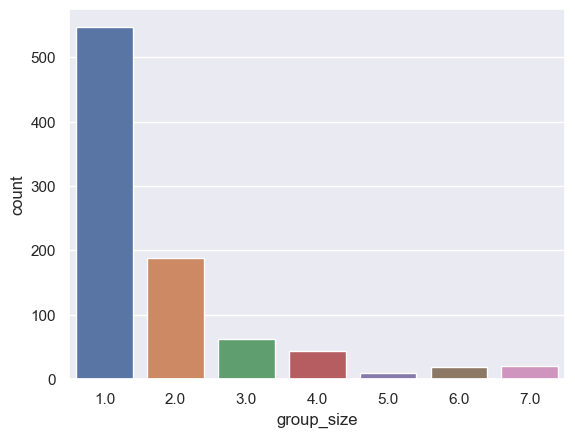

In [23]:
ax = sns.countplot(data=train, x='group_size')
plt.show()

### group_size cat

In [24]:
for dataset in train_test_data:
    dataset.loc[dataset['group_size'] == 1, 'group_size'] = 0
    dataset.loc[dataset['group_size'] == 2, 'group_size'] = 1
    dataset.loc[dataset['group_size'] == 3, 'group_size'] = 2
    dataset.loc[dataset['group_size'] == 4, 'group_size'] = 3
    dataset.loc[dataset['group_size'] > 4 , 'group_size'] = 4


train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,2,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,26.5500,C123,0,2,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,0.0


In [25]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,group_size
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.464115,0.748804,0.349282
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.685516,1.018562,0.757069
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000,1.000000,0.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,2.000000,4.000000,4.000000


In [26]:
# grid = sns.FacetGrid(train, row='Embarked',col='Pclass' ,aspect=1.6)
# grid.map(sns.barplot, 'Fare', alpha=.5)
# grid.add_legend()

### Fare_cat

In [27]:
for dataset in train_test_data:

    dataset.loc[dataset['Fare'] <= 7,'Fare'] = 0.4
    dataset.loc[(dataset['Fare'] >7) & (dataset['Fare'] <=8.8), 'Fare'] = 0.8
    dataset.loc[(dataset['Fare'] >8.8) & (dataset['Fare'] <=17), 'Fare'] = 1.2
    dataset.loc[(dataset['Fare'] >17) & (dataset['Fare'] <=30), 'Fare'] = 1.6
    dataset.loc[(dataset['Fare'] >30) & (dataset['Fare'] <=100), 'Fare'] = 2.0
    dataset.loc[dataset['Fare'] > 100,'Fare'] = 2.4


In [28]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,group_size
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,1.131313,0.363636,0.740741,0.720539
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,0.492775,0.636159,1.052077,1.140379
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,1.600000,1.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,2.400000,2.000000,4.000000,4.000000


## Sex

In [29]:
sex_mapping = {'male':0, 'female':1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

## Test['Fare']

In [30]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,0,0,0.0


In [31]:
test['Fare'].fillna(
    test.groupby('Pclass')['Fare'].transform('median'), inplace=True
)

## FamilySize

In [32]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

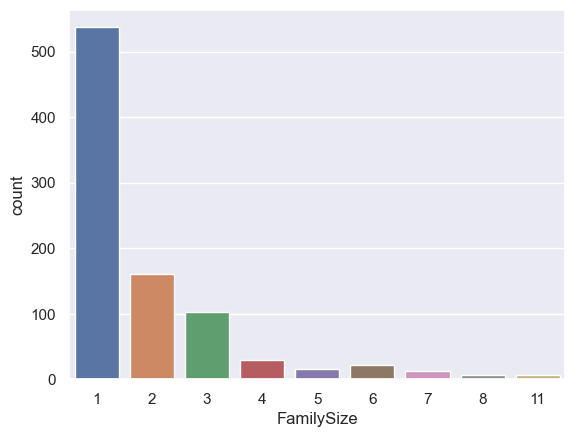

In [33]:
ax = sns.countplot(data=train, x='FamilySize')
plt.show()

In [34]:
for dataset in train_test_data:

    dataset.loc[dataset['FamilySize'] <= 1,'FamilySize'] = 0.4
    dataset.loc[(dataset['FamilySize'] == 2), 'FamilySize'] = 0.8
    dataset.loc[(dataset['FamilySize'] == 3), 'FamilySize'] = 1.2
    dataset.loc[(dataset['FamilySize'] > 3), 'FamilySize'] = 1.6



train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0.8,NaN,0,0,0.0,0.8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,2.0,C85,1,2,0.0,0.8
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,0.8,NaN,0,1,0.0,0.4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,1.6,C123,0,2,1.0,0.8
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,0.8,NaN,0,0,0.0,0.4


## Age


In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0.8,NaN,0,0,0.0,0.8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,2.0,C85,1,2,0.0,0.8
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,0.8,NaN,0,1,0.0,0.4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,1.6,C123,0,2,1.0,0.8
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,0.8,NaN,0,0,0.0,0.4


In [36]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'group_size',
       'FamilySize'],
      dtype='object')

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Title        891 non-null    int64  
 13  group_size   891 non-null    float64
 14  FamilySize   891 non-null    float64
dtypes: float64(4), int64(8), object(3)
memory usage: 104.5+ KB


In [38]:
# train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
# test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

### Age_cat


In [39]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 17, 'Age'] =0
    dataset.loc[(dataset['Age'] >17) & (dataset['Age'] <= 21), 'Age'] = 1
    dataset.loc[(dataset['Age'] >21) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] >30) & (dataset['Age'] <= 34), 'Age'] = 3
    dataset.loc[(dataset['Age'] >34) & (dataset['Age'] <= 60), 'Age'] = 4
    dataset.loc[dataset['Age'] >60, 'Age'] = 5

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.8,NaN,0,0,0.0,0.8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,4.0,1,0,PC 17599,2.0,C85,1,2,0.0,0.8
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,0.8,NaN,0,1,0.0,0.4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4.0,1,0,113803,1.6,C123,0,2,1.0,0.8
4,5,0,3,"Allen, Mr. William Henry",0,4.0,0,0,373450,0.8,NaN,0,0,0.0,0.4


### Age_predict

In [40]:
train['Age'].isnull().sum(), test['Age'].isnull().sum()

(177, 86)

In [41]:
isnull_age = pd.concat([train[train['Age'].isnull()],test[test['Age'].isnull()]],ignore_index=True)

isnull_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  263 non-null    int64  
 1   Survived     177 non-null    float64
 2   Pclass       263 non-null    int64  
 3   Name         263 non-null    object 
 4   Sex          263 non-null    int64  
 5   Age          0 non-null      float64
 6   SibSp        263 non-null    int64  
 7   Parch        263 non-null    int64  
 8   Ticket       263 non-null    object 
 9   Fare         263 non-null    float64
 10  Cabin        23 non-null     object 
 11  Embarked     263 non-null    int64  
 12  Title        263 non-null    int64  
 13  group_size   263 non-null    float64
 14  FamilySize   263 non-null    float64
dtypes: float64(5), int64(7), object(3)
memory usage: 30.9+ KB


In [42]:
train['Age'].notnull().sum(), test['Age'].notnull().sum()

(714, 332)

In [43]:
notnull_age = pd.concat([train[train['Age'].notnull()],test[test['Age'].notnull()]],ignore_index=True)

notnull_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1046 non-null   int64  
 1   Survived     714 non-null    float64
 2   Pclass       1046 non-null   int64  
 3   Name         1046 non-null   object 
 4   Sex          1046 non-null   int64  
 5   Age          1046 non-null   float64
 6   SibSp        1046 non-null   int64  
 7   Parch        1046 non-null   int64  
 8   Ticket       1046 non-null   object 
 9   Fare         1046 non-null   float64
 10  Cabin        272 non-null    object 
 11  Embarked     1046 non-null   int64  
 12  Title        1046 non-null   int64  
 13  group_size   1046 non-null   float64
 14  FamilySize   1046 non-null   float64
dtypes: float64(5), int64(7), object(3)
memory usage: 122.7+ KB


In [44]:
notnull_age = notnull_age[['PassengerId','Pclass','Sex','Age','Fare','Embarked','Title','group_size','FamilySize']]
isnull_age = isnull_age[['PassengerId','Pclass','Sex','Age','Fare','Embarked','Title','group_size','FamilySize']]

In [45]:
notnull_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1046 non-null   int64  
 1   Pclass       1046 non-null   int64  
 2   Sex          1046 non-null   int64  
 3   Age          1046 non-null   float64
 4   Fare         1046 non-null   float64
 5   Embarked     1046 non-null   int64  
 6   Title        1046 non-null   int64  
 7   group_size   1046 non-null   float64
 8   FamilySize   1046 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 73.7 KB


In [46]:
# predict_train_age = predict_age[predict_age['Age'].notnull()]
# predict_test_age = predict_age[predict_age['Age'].isnull()]

In [47]:
# predict_train_age.reset_index(inplace=True)
# predict_test_age.reset_index(inplace=True)

In [48]:
notnull_age['Age'].unique()

array([2., 4., 0., 1., 3., 5.])

In [49]:
test_data = isnull_age.drop('Age',axis=1)

train_data = notnull_age.drop('Age',axis=1)
target = notnull_age['Age']

train_data.shape,target.shape

((1046, 8), (1046,))

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1046 non-null   int64  
 1   Pclass       1046 non-null   int64  
 2   Sex          1046 non-null   int64  
 3   Fare         1046 non-null   float64
 4   Embarked     1046 non-null   int64  
 5   Title        1046 non-null   int64  
 6   group_size   1046 non-null   float64
 7   FamilySize   1046 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 65.5 KB


In [51]:
target.isnull().sum()

0

In [ ]:
k_fold = KFold(n_splits=10,shuffle=True, random_state=44)
clf = RandomForestClassifier(n_estimators=500, max_depth=3)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

In [ ]:
k_fold = KFold(n_splits=10,shuffle=True, random_state=44)
clf = DecisionTreeClassifier(max_depth=5
                             ,min_samples_split=7
                             ,splitter='best'
                             , random_state=44)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.4579578754578755


In [ ]:
k_fold = KFold(n_splits=10,shuffle=True, random_state=44)
clf = KNeighborsClassifier(n_neighbors=4)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.24377289377289374


In [ ]:
clf = DecisionTreeClassifier(max_depth=5
                             ,min_samples_split=7
                             ,splitter='best'
                             , random_state=44)
clf.fit(train_data, target)
age_predict = clf.predict(test_data)

In [ ]:
isnull_age['Age'] = age_predict

In [ ]:
isnull_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  263 non-null    int64  
 1   Pclass       263 non-null    int64  
 2   Sex          263 non-null    int64  
 3   Age          263 non-null    float64
 4   Fare         263 non-null    float64
 5   Embarked     263 non-null    int64  
 6   Title        263 non-null    int64  
 7   group_size   263 non-null    float64
 8   FamilySize   263 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 18.6 KB


In [ ]:
notnull_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1046 non-null   int64  
 1   Pclass       1046 non-null   int64  
 2   Sex          1046 non-null   int64  
 3   Age          1046 non-null   float64
 4   Fare         1046 non-null   float64
 5   Embarked     1046 non-null   int64  
 6   Title        1046 non-null   int64  
 7   group_size   1046 non-null   float64
 8   FamilySize   1046 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 73.7 KB


In [ ]:
all_traintest = pd.concat([notnull_age,isnull_age],ignore_index=True)
all_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   Fare         1309 non-null   float64
 5   Embarked     1309 non-null   int64  
 6   Title        1309 non-null   int64  
 7   group_size   1309 non-null   float64
 8   FamilySize   1309 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 92.2 KB


In [ ]:
all_traintest = all_traintest.sort_values(by='PassengerId',ignore_index=True)

In [ ]:
all_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   Fare         1309 non-null   float64
 5   Embarked     1309 non-null   int64  
 6   Title        1309 non-null   int64  
 7   group_size   1309 non-null   float64
 8   FamilySize   1309 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 92.2 KB


In [ ]:
all_traintest['PassengerId']

0          1
1          2
2          3
3          4
4          5
        ... 
1304    1305
1305    1306
1306    1307
1307    1308
1308    1309
Name: PassengerId, Length: 1309, dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
 11  Title        418 non-null    int64  
 12  group_size   418 non-null    float64
 13  FamilySize   418 non-null    float64
dtypes: float64(4), int64(7), object(3)
memory usage: 45.8+ KB


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size,FamilySize
0,892,3,"Kelly, Mr. James",0,4.0,0,0,330911,0.8,NaN,2,0,0.0,0.4
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,4.0,1,0,363272,0.4,NaN,0,2,0.0,0.8
2,894,2,"Myles, Mr. Thomas Francis",0,5.0,0,0,240276,1.2,NaN,2,0,0.0,0.4
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,0.8,NaN,0,0,0.0,0.4
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2.0,1,1,3101298,1.2,NaN,0,2,0.0,1.2


In [ ]:
all_traintest[all_traintest['PassengerId']>=892].reset_index()['Age']

0      4.0
1      4.0
2      5.0
3      2.0
4      2.0
      ... 
413    2.0
414    4.0
415    4.0
416    2.0
417    0.0
Name: Age, Length: 418, dtype: float64

In [ ]:
test['Age'] = all_traintest[all_traintest['PassengerId']>=892].reset_index()['Age']

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
group_size       0
FamilySize       0
dtype: int64

In [ ]:
train['Age'] = all_traintest[all_traintest['PassengerId']<892].reset_index()['Age']

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
group_size       0
FamilySize       0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Title        891 non-null    int64  
 13  group_size   891 non-null    float64
 14  FamilySize   891 non-null    float64
dtypes: float64(4), int64(8), object(3)
memory usage: 104.5+ KB


In [ ]:
sns.set(color_codes=True)

facet = sns.FacetGrid(train[train['Pclass']==1], hue='Age',aspect=3)
facet.map(sns.kdeplot,'Fare',fill=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.show()

c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


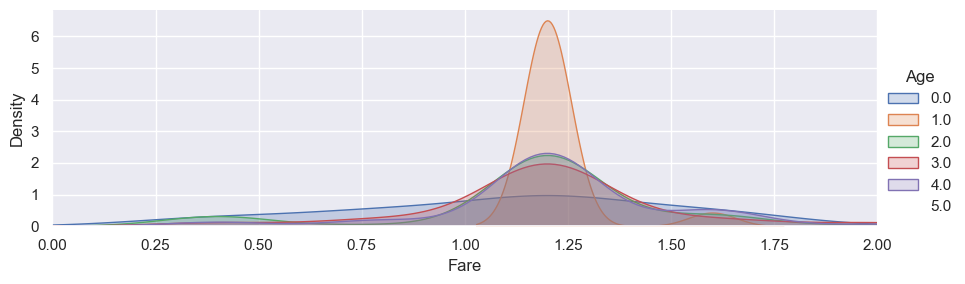

In [ ]:
sns.set(color_codes=True)

facet = sns.FacetGrid(train[train['Pclass']==2], hue='Age',aspect=3)
facet.map(sns.kdeplot,'Fare',fill=True)
facet.set(xlim=(0,train[train['Pclass']==2]['Fare'].max()))
facet.add_legend()

plt.show()

(0.0, 10.0)

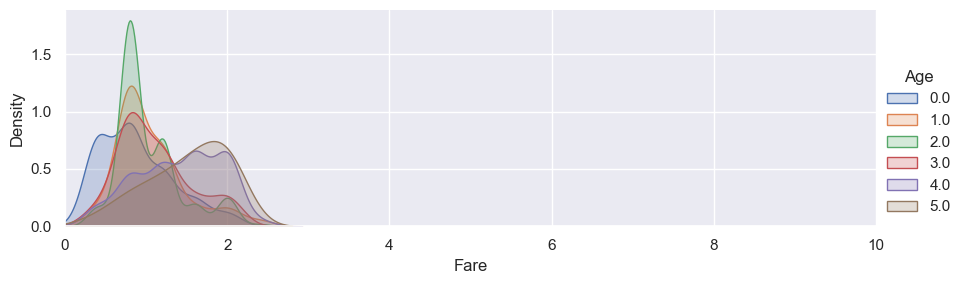

In [ ]:
sns.set(color_codes=True)

facet = sns.FacetGrid(train, hue='Age',aspect=3)
facet.map(sns.kdeplot,'Fare',fill=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.xlim(0,10)

## Cabin

In [ ]:
train[(train['Cabin'].notnull()) & (train['Pclass']==1)].iloc[:10,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size,FamilySize
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,4.0,1,0,PC 17599,2.0,C85,1,2,0.0,0.8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4.0,1,0,113803,1.6,C123,0,2,1.0,0.8
6,7,0,1,"McCarthy, Mr. Timothy J",0,4.0,0,0,17463,2.0,E46,0,0,0.0,0.4
11,12,1,1,"Bonnell, Miss. Elizabeth",1,4.0,0,0,113783,1.6,C103,0,1,0.0,0.4
23,24,1,1,"Sloper, Mr. William Thompson",0,2.0,0,0,113788,2.0,A6,0,0,0.0,0.4
27,28,0,1,"Fortune, Mr. Charles Alexander",0,1.0,3,2,19950,2.0,C23 C25 C27,0,0,3.0,1.6
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,4.0,1,0,PC 17569,2.0,B78,1,2,1.0,0.8
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",1,4.0,1,0,PC 17572,1.6,D33,1,2,2.0,0.8
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",0,5.0,0,1,113509,2.0,B30,1,0,0.0,0.8
55,56,1,1,"Woolner, Mr. Hugh",0,4.0,0,0,19947,2.0,C52,0,0,0.0,0.4


In [ ]:
train[(train['Cabin'].isnull()) & (train['Pclass']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size,FamilySize
30,31,0,1,"Uruchurtu, Don. Manuel E",0,4.0,0,0,PC 17601,1.6,NaN,1,4,0.0,0.4
34,35,0,1,"Meyer, Mr. Edgar Joseph",0,2.0,1,0,PC 17604,2.0,NaN,1,0,1.0,0.8
35,36,0,1,"Holverson, Mr. Alexander Oskar",0,4.0,1,0,113789,1.6,NaN,0,0,1.0,0.8
64,65,0,1,"Stewart, Mr. Albert A",0,4.0,0,0,PC 17605,1.6,NaN,1,0,0.0,0.4
83,84,0,1,"Carrau, Mr. Francisco M",0,2.0,0,0,113059,2.0,NaN,0,0,0.0,0.4
155,156,0,1,"Williams, Mr. Charles Duane",0,4.0,0,1,PC 17597,2.0,NaN,1,0,0.0,0.8
168,169,0,1,"Baumann, Mr. John D",0,4.0,0,0,PC 17318,1.6,NaN,0,0,0.0,0.4
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",0,4.0,0,0,111428,1.6,NaN,0,0,0.0,0.4
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",1,4.0,0,0,PC 17585,2.0,NaN,1,2,0.0,0.4
258,259,1,1,"Ward, Miss. Anna",1,4.0,0,0,PC 17755,2.4,NaN,1,1,2.0,0.4


In [ ]:
train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]

In [ ]:
cabin_mapping = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "T": 7}

train['Cabin'] = train['Cabin'].map(cabin_mapping)
test['Cabin'] = test['Cabin'].map(cabin_mapping)

In [ ]:
#fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [ ]:
train['Cabin'].isnull().sum(), test['Cabin'].isnull().sum()

(687, 327)

In [ ]:
train['Cabin'].notnull().sum(), test['Cabin'].notnull().sum()

(204, 91)

In [ ]:
isnull_cabin = pd.concat([train[train['Cabin'].isnull()],test[test['Cabin'].isnull()]],ignore_index=True)
isnull_cabin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1014 non-null   int64  
 1   Survived     687 non-null    float64
 2   Pclass       1014 non-null   int64  
 3   Name         1014 non-null   object 
 4   Sex          1014 non-null   int64  
 5   Age          1014 non-null   float64
 6   SibSp        1014 non-null   int64  
 7   Parch        1014 non-null   int64  
 8   Ticket       1014 non-null   object 
 9   Fare         1014 non-null   float64
 10  Cabin        0 non-null      float64
 11  Embarked     1014 non-null   int64  
 12  Title        1014 non-null   int64  
 13  group_size   1014 non-null   float64
 14  FamilySize   1014 non-null   float64
dtypes: float64(6), int64(7), object(2)
memory usage: 119.0+ KB


In [ ]:
notnull_cabin = pd.concat([train[train['Cabin'].notnull()],test[test['Cabin'].notnull()]],ignore_index=True)
notnull_cabin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Survived     204 non-null    float64
 2   Pclass       295 non-null    int64  
 3   Name         295 non-null    object 
 4   Sex          295 non-null    int64  
 5   Age          295 non-null    float64
 6   SibSp        295 non-null    int64  
 7   Parch        295 non-null    int64  
 8   Ticket       295 non-null    object 
 9   Fare         295 non-null    float64
 10  Cabin        295 non-null    float64
 11  Embarked     295 non-null    int64  
 12  Title        295 non-null    int64  
 13  group_size   295 non-null    float64
 14  FamilySize   295 non-null    float64
dtypes: float64(6), int64(7), object(2)
memory usage: 34.7+ KB


In [ ]:
notnull_cabin= notnull_cabin[['PassengerId','Pclass','Sex','Age','Fare','Cabin','Embarked','Title','group_size','FamilySize']]
isnull_cabin = isnull_cabin[['PassengerId','Pclass','Sex','Age','Fare','Cabin','Embarked','Title','group_size','FamilySize']]

In [ ]:
notnull_cabin['Cabin'].unique()

array([2., 4., 6., 3., 0., 1., 5., 7.])

In [ ]:
test_data = isnull_cabin.drop('Cabin',axis=1)

train_data = notnull_cabin.drop('Cabin',axis=1)
target = notnull_cabin['Cabin']

train_data.shape,target.shape

((295, 9), (295,))

In [ ]:
target.isnull().sum()

0

In [ ]:
k_fold = KFold(n_splits=10,shuffle=True, random_state=46)
clf = RandomForestClassifier(n_estimators=500, max_depth=6, random_state=46)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.42091954022988504


In [ ]:
k_fold = KFold(n_splits=10,shuffle=True, random_state=44)
clf = DecisionTreeClassifier(max_depth=5
                             ,min_samples_split=7
                             ,splitter='best'
                             , random_state=46)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.35218390804597705


In [ ]:
k_fold = KFold(n_splits=10,shuffle=True, random_state=46)
clf = KNeighborsClassifier(n_neighbors=4)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.24781609195402296


In [ ]:
clf = RandomForestClassifier(n_estimators=500, max_depth=6, random_state=46)
clf.fit(train_data, target)
cabin_predict = clf.predict(test_data)

In [ ]:
isnull_cabin['Cabin'] = cabin_predict

In [ ]:
isnull_cabin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1014 non-null   int64  
 1   Pclass       1014 non-null   int64  
 2   Sex          1014 non-null   int64  
 3   Age          1014 non-null   float64
 4   Fare         1014 non-null   float64
 5   Cabin        1014 non-null   float64
 6   Embarked     1014 non-null   int64  
 7   Title        1014 non-null   int64  
 8   group_size   1014 non-null   float64
 9   FamilySize   1014 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 79.3 KB


In [ ]:
notnull_cabin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Sex          295 non-null    int64  
 3   Age          295 non-null    float64
 4   Fare         295 non-null    float64
 5   Cabin        295 non-null    float64
 6   Embarked     295 non-null    int64  
 7   Title        295 non-null    int64  
 8   group_size   295 non-null    float64
 9   FamilySize   295 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 23.2 KB


In [ ]:
all_traintest = pd.concat([notnull_cabin,isnull_cabin],ignore_index=True)
all_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   Fare         1309 non-null   float64
 5   Cabin        1309 non-null   float64
 6   Embarked     1309 non-null   int64  
 7   Title        1309 non-null   int64  
 8   group_size   1309 non-null   float64
 9   FamilySize   1309 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 102.4 KB


In [ ]:
all_traintest = all_traintest.sort_values(by='PassengerId',ignore_index=True)
all_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   Fare         1309 non-null   float64
 5   Cabin        1309 non-null   float64
 6   Embarked     1309 non-null   int64  
 7   Title        1309 non-null   int64  
 8   group_size   1309 non-null   float64
 9   FamilySize   1309 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 102.4 KB


In [ ]:
all_traintest[all_traintest['PassengerId']<892].reset_index()['Cabin']


0      5.0
1      2.0
2      5.0
3      2.0
4      5.0
      ... 
886    5.0
887    1.0
888    6.0
889    2.0
890    5.0
Name: Cabin, Length: 891, dtype: float64

In [ ]:
train['Cabin'] = all_traintest[all_traintest['PassengerId']<892].reset_index()['Cabin']

In [ ]:
test['Cabin'] = all_traintest[all_traintest['PassengerId']>=892].reset_index()['Cabin']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     891 non-null    int64  
 12  Title        891 non-null    int64  
 13  group_size   891 non-null    float64
 14  FamilySize   891 non-null    float64
dtypes: float64(5), int64(8), object(2)
memory usage: 104.5+ KB


In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
group_size     0
FamilySize     0
dtype: int64

---

# 결과 예측 머신러닝

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'group_size',
       'FamilySize'],
      dtype='object')

In [ ]:
features_drop = ['Ticket','SibSp','Parch','Name']
train = train.drop(features_drop,axis=1)
test = test.drop(features_drop, axis=1)

In [ ]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Title', 'group_size', 'FamilySize'],
      dtype='object')

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin',
       'Embarked', 'Title', 'group_size', 'FamilySize'],
      dtype='object')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Cabin        418 non-null    float64
 6   Embarked     418 non-null    int64  
 7   Title        418 non-null    int64  
 8   group_size   418 non-null    float64
 9   FamilySize   418 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 32.8 KB


In [ ]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']

train_data.shape,target.shape

((891, 10), (891,))

In [ ]:
train_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,group_size,FamilySize
0,1,3,0,2.0,0.8,5.0,0,0,0.0,0.8
1,2,1,1,4.0,2.0,2.0,1,2,0.0,0.8
2,3,3,1,2.0,0.8,5.0,0,1,0.0,0.4
3,4,1,1,4.0,1.6,2.0,0,2,1.0,0.8
4,5,3,0,4.0,0.8,5.0,0,0,0.0,0.4


In [ ]:
k_fold = KFold(n_splits=10,shuffle=True, random_state=42)
clf = KNeighborsClassifier(n_neighbors=8)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.5925842696629213


In [ ]:
k_fold = KFold(n_splits=10,shuffle=True, random_state=42)
clf = DecisionTreeClassifier(max_depth=5)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.8125343320848938


In [ ]:
parameters = {'n_estimators':[300,400,500]
              ,'max_depth':[2,4,6,8]
              }

k_fold = KFold(n_splits=10,shuffle=True, random_state=42)
rf_clf = RandomForestClassifier()
scoring = 'accuracy'
grid_clf = GridSearchCV(rf_clf,param_grid=parameters,scoring=scoring,cv=k_fold,n_jobs=-1)

grid_clf.fit(train_data,target)
print(grid_clf.best_params_)
print(grid_clf.best_score_)


#score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
#print(score.mean())

{'max_depth': 6, 'n_estimators': 400}
0.8226716604244695


In [ ]:
k_fold = KFold(n_splits=10,shuffle=True, random_state=42)
clf = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.8058302122347067


In [ ]:
train_data.describe()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,group_size,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.352413,2.322110,1.131313,4.232323,0.363636,0.740741,0.720539,0.686420
std,257.353842,0.836071,0.477990,1.410456,0.492775,1.452974,0.636159,1.052077,1.140379,0.409145
min,1.000000,1.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.400000
25%,223.500000,2.000000,0.000000,2.000000,0.800000,4.000000,0.000000,0.000000,0.000000,0.400000
50%,446.000000,3.000000,0.000000,2.000000,1.200000,5.000000,0.000000,0.000000,0.000000,0.400000
75%,668.500000,3.000000,1.000000,4.000000,1.600000,5.000000,1.000000,1.000000,1.000000,0.800000
max,891.000000,3.000000,1.000000,5.000000,2.400000,7.000000,2.000000,4.000000,4.000000,1.600000


In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
group_size     0
FamilySize     0
dtype: int64

## test

In [ ]:
clf = RandomForestClassifier(n_estimators= 400
                             ,max_depth= 6)
clf.fit(train_data, target)

prediction = clf.predict(test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(train_data, target)
prediction = lr_clf.predict(test)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Cabin        418 non-null    float64
 6   Embarked     418 non-null    int64  
 7   Title        418 non-null    int64  
 8   group_size   418 non-null    float64
 9   FamilySize   418 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 32.8 KB


In [ ]:
submission = pd.DataFrame({

    'PassengerId':test['PassengerId']
    ,'Survived':prediction
})
submission.to_csv('submission.csv',index=False)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
gbm = XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(train_data, target)
xgb_predictions = gbm.predict(test)

In [ ]:
xgb_submission = pd.DataFrame({

    'PassengerId':test['PassengerId']
    ,'Survived':xgb_predictions
})
xgb_submission.to_csv('xgb_submission.csv',index=False)